## Linear regression with multiple variables

using ex1data2.txt

### 1.1 Feature Normalization 

Standardization $X\sim(0,1)$:

$X_{new}=\frac{X-mean(X)}{std(X)}$

Normalization $X\in{(0,1)}$:

$X_{new}=\frac{X-min(X)}{max(X)-min(X)}$

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
data=pd.read_csv("ex1data2.txt",names=["size of the house","number of the bedrooms","price"])
print(data.shape)
data.head()

(47, 3)


,size of the house,number of the bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [107]:
X=data.iloc[:,:2]
y=data.iloc[:,-1:]
print("shape of X: {}".format(X.shape))
print("shape of y: {}".format(y.shape))

def feature_Standardization(X):
    return (X-np.mean(X))/np.std(X)
X=feature_Standardization(X)
y=feature_Standardization(y)

shape of X: (47, 2)
shape of y: (47, 1)


### 1.2 Gradient descent

In [108]:
#Add intercept term
X.insert(0,"Ones",1)

In [109]:
def compute_cost(theta,X,y):
    m=X.shape[0]
    inner=np.sum(np.power(X*theta.T-y,2))
    
    return (1/(2*m))*inner

In [110]:
def batch_gradient_descent(theta,X,y,iterations,alpha):
    """
    :param X: matrix
    :param y: matrix
    :param theta: matrix
    """
    parameters=int(theta.ravel().shape[1])
    temp=np.mat(np.zeros(theta.shape))
    cost=np.zeros(iterations)
    m=X.shape[0]
    
    for i in range(iterations):
        error=X*theta.T-y
        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=temp[0,j]-(alpha/m)*np.sum(term)
            
        theta=temp
        cost[i]=compute_cost(theta,X,y)
    return theta,cost

In [111]:
X=np.mat(X.values)
y=np.mat(y.values)
theta=np.mat(np.zeros(X.shape[1]))
alpha=0.01
iterations=1500

In [118]:
g,cost=batch_gradient_descent(theta,X,y,iterations,alpha)
print("cost value :{}".format(compute_cost(g,X,theta)))

cost value :1.0986399254243


Text(0, 0.5, 'epoch')

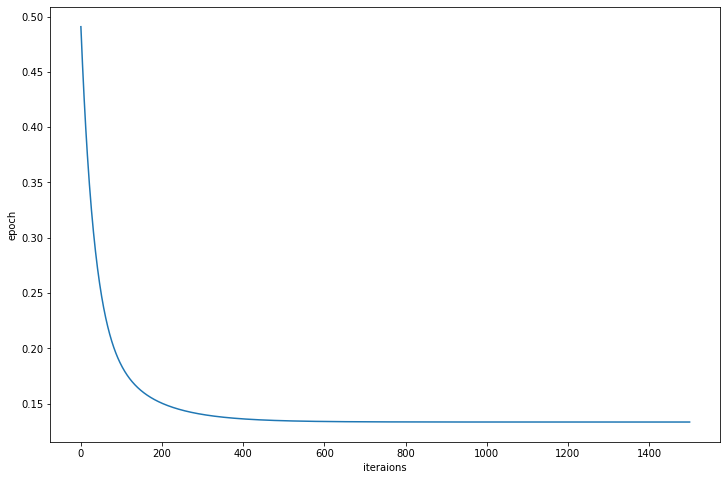

In [121]:
plt.figure(figsize=(12,8))

iterations=np.linspace(0,1500,1500)
plt.plot(iterations,cost)
plt.xlabel("iteraions")
plt.ylabel("epoch")